This workbook is a copy of the workbook for 2 second long samples but run on the 1 second long samples

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import os
import numpy as np
import matplotlib.pyplot as plt

In [53]:
tf.config.optimizer.set_jit(True)

In [54]:
#early stopping implemented to reduce very long processing times
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [55]:
#a number of variations of these parameters were used to try and find a balance of best accuracy and runtime, smaller batch sizes made it take much much longer to run a training session
batch_size = 256
epochs = 100
#image height and width were reduced to try and make it run faster but it didnt have much of an effect so the full image sizes were used
IMG_HEIGHT = 129
IMG_WIDTH = 98
TRAIN_PATH = 'train1'
VAL_PATH = 'test1'

In [56]:
classes = sorted(os.listdir(TRAIN_PATH))
num_samples = []

for c in classes:
    class_dir = os.path.join(TRAIN_PATH, c)
    num_samples.append(len(os.listdir(class_dir)))

In [57]:
total_samples = sum(num_samples)
num_classes = len(classes)
num_samples_per_class = total_samples / num_classes

class_weight = {}
for i, c in enumerate(classes):
    class_weight[i] = total_samples / (num_classes * num_samples[i])

class_weight = np.array(list(class_weight.values()))

In [58]:
weights = {}
for i, class_name in enumerate(class_names):
    weights[i] = class_weight[i]
print(weights)

{0: 0.32036714457992765, 1: 53.13111111111111, 2: 9.879752066115703, 3: 0.6656180400890869, 4: 8.301736111111111, 5: 2.179489516864175, 6: 10.217521367521368, 7: 0.5650909950366344, 8: 5.508986175115207, 9: 0.38053477638070987}


In [59]:
val_data =  tf.keras.utils.image_dataset_from_directory(
    batch_size=batch_size,
    label_mode='categorical',
    directory=VAL_PATH,
    shuffle=True,
    color_mode="grayscale",
    image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 10226 files belonging to 10 classes.


In [20]:
train_data =  tf.keras.utils.image_dataset_from_directory(
    batch_size=batch_size,
    label_mode='categorical',
    directory=TRAIN_PATH,
    color_mode="grayscale",
    shuffle=True,
    image_size=(IMG_HEIGHT, IMG_WIDTH))


Found 23909 files belonging to 10 classes.


In [60]:
class_names = train_data.class_names
print(class_names)

['alt', 'classical', 'country', 'edm', 'funk&soul', 'hip hop', 'jazz', 'pop', 'r&b', 'rock']


In [61]:
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
model = Sequential([
    layers.Input(shape=(IMG_HEIGHT,IMG_WIDTH,1)),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
     layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation="softmax"),
])
# Compile the model
model.compile(optimizer='adam',              
              loss="categorical_crossentropy",              
              metrics=['accuracy'])
# print the model architecture
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 127, 96, 16)       160       
                                                                 
 batch_normalization_12 (Bat  (None, 127, 96, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 94, 16)       2320      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 45, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 60, 45, 32)      

In [63]:
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    callbacks=[early_stopping],
    class_weight=weights
)

Epoch 1/100
94/94 [==============================] - 294s 3s/step - loss: 4.0513 - accuracy: 0.1353 - val_loss: 4.7391 - val_accuracy: 0.1569
Epoch 2/100
94/94 [==============================] - 238s 3s/step - loss: 2.7205 - accuracy: 0.1884 - val_loss: 2.5981 - val_accuracy: 0.2297
Epoch 3/100
94/94 [==============================] - 253s 3s/step - loss: 2.5111 - accuracy: 0.2159 - val_loss: 2.8432 - val_accuracy: 0.1131
Epoch 4/100
94/94 [==============================] - 267s 3s/step - loss: 2.3006 - accuracy: 0.2465 - val_loss: 2.5879 - val_accuracy: 0.1925
Epoch 5/100
94/94 [==============================] - 219s 2s/step - loss: 2.1206 - accuracy: 0.2657 - val_loss: 2.6365 - val_accuracy: 0.1436
Epoch 6/100
94/94 [==============================] - 239s 3s/step - loss: 1.9720 - accuracy: 0.2973 - val_loss: 2.4714 - val_accuracy: 0.2570
Epoch 7/100
94/94 [==============================] - 219s 2s/step - loss: 1.8590 - accuracy: 0.3042 - val_loss: 2.5547 - val_accuracy: 0.2314
Epoch 

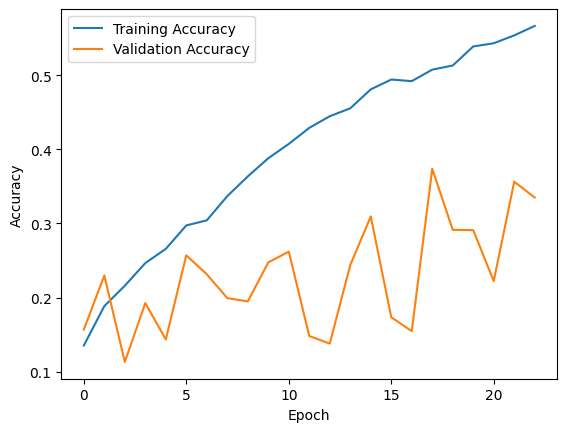

In [64]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

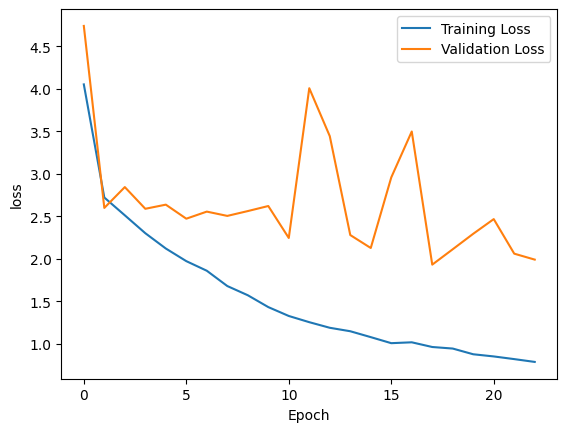

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import classification_report

y_pred = model.predict(val_data)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true_list = []
for image, label in val_data:
    y_true_list.append(np.argmax(label.numpy(), axis=1))
y_true = np.concatenate(y_true_list)
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

print(report)


40/40 [==============================] - 20s 485ms/step
{'alt': {'precision': 0.31124863487440846, 'recall': 0.27125634517766495, 'f1-score': 0.28987964061705374, 'support': 3152}, 'classical': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 20}, 'country': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 113}, 'edm': {'precision': 0.1402116402116402, 'recall': 0.17869184086311532, 'f1-score': 0.15713015120071153, 'support': 1483}, 'funk&soul': {'precision': 0.008064516129032258, 'recall': 0.017857142857142856, 'f1-score': 0.011111111111111112, 'support': 112}, 'hip hop': {'precision': 0.04285714285714286, 'recall': 0.033482142857142856, 'f1-score': 0.03759398496240601, 'support': 448}, 'jazz': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 106}, 'pop': {'precision': 0.17399710004833252, 'recall': 0.19682886823400766, 'f1-score': 0.18471010774756286, 'support': 1829}, 'r&b': {'precision': 0.08, 'recall': 0.018957345971563982, 'f1-score': 0.0306

In [67]:
import pandas as pd

df_report = pd.DataFrame.from_dict(report).transpose()

df_report['precision'] = df_report['precision'].map('{:.2f}'.format)
df_report['recall'] = df_report['recall'].map('{:.2f}'.format)
df_report['f1-score'] = df_report['f1-score'].map('{:.2f}'.format)
df_report['support'] = df_report['support'].astype(int)

print(df_report)

             precision recall f1-score  support
alt               0.31   0.27     0.29     3152
classical         0.00   0.00     0.00       20
country           0.00   0.00     0.00      113
edm               0.14   0.18     0.16     1483
funk&soul         0.01   0.02     0.01      112
hip hop           0.04   0.03     0.04      448
jazz              0.00   0.00     0.00      106
pop               0.17   0.20     0.18     1829
r&b               0.08   0.02     0.03      211
rock              0.26   0.26     0.26     2752
accuracy          0.22   0.22     0.22        0
macro avg         0.10   0.10     0.10    10226
weighted avg      0.22   0.22     0.22    10226


             precision recall f1-score  support
alt               0.31   0.27     0.29     3152
classical         0.00   0.00     0.00       20
country           0.00   0.00     0.00      113
edm               0.14   0.18     0.16     1483
funk&soul         0.01   0.02     0.01      112
hip hop           0.04   0.03     0.04      448
jazz              0.00   0.00     0.00      106
pop               0.17   0.20     0.18     1829
r&b               0.08   0.02     0.03      211
rock              0.26   0.26     0.26     2752
accuracy          0.22   0.22     0.22        0
macro avg         0.10   0.10     0.10    10226
weighted avg      0.22   0.22     0.22    10226